#**Water Potabilicy Classification**
* Maze Learner
* 1876331 Hakyun Lee, 1929038 Seojun Heo, 1976292 Shinhye Lee, 2070031 Minji Park, 2076033 Doyeon Kim, 2076394 Hyunyoung Jo 
* data : water quality data (https://www.kaggle.com/datasets/adityakadiwal/water-potability)
---


## **1. Load Data & Import Packages**

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [116]:
# path에 data가 저장된 경로 입력
path="/content/drive/MyDrive/기계학습/Team Project/water_potability.csv"

In [19]:
pip install dataprep

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import create_report

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,f1_score,accuracy_score
from sklearn.model_selection import GridSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve,plot_roc_curve
from sklearn.metrics import precision_recall_curve, roc_curve, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import sklearn.model_selection as ms
import sklearn.metrics as mt
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [22]:
#warning 출력 숨기기
#https://wotres.tistory.com/entry/%ED%8C%8C%EC%9D%B4%EC%8D%AC%EC%97%90%EC%84%9C-warning-%EC%95%88%EB%B3%B4%EC%9D%B4%EA%B2%8C-%ED%95%98%EB%8A%94%EB%B2%95
import warnings
warnings.filterwarnings(action='ignore')

* data loading

In [117]:
water=pd.read_csv(path)
water_o=pd.read_csv(path)

## **2. EDA**

In [24]:
water.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [25]:
water.shape

(3276, 10)

In [26]:
water.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


DataPrep Report
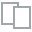
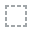
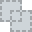
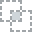
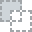
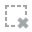
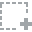
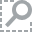
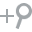
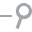
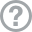
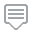
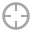
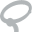
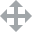
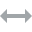
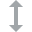
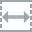
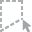
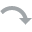
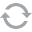
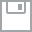
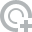
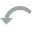
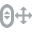
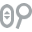
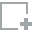
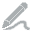
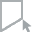
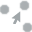
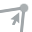
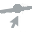

In [27]:
create_report(water)

In [114]:
water2=water.dropna(axis=0)

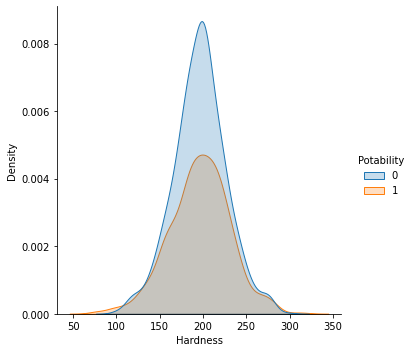

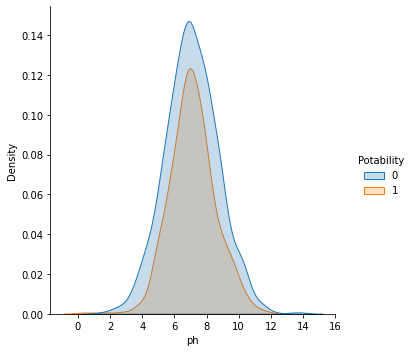

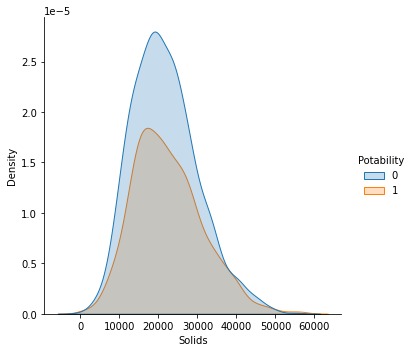

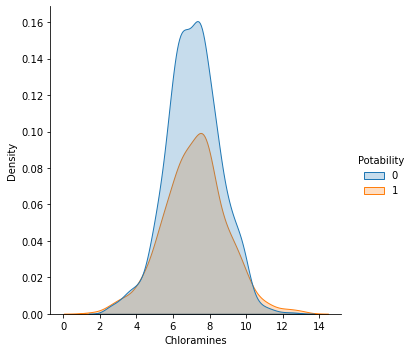

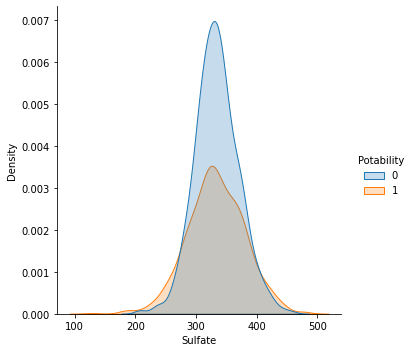

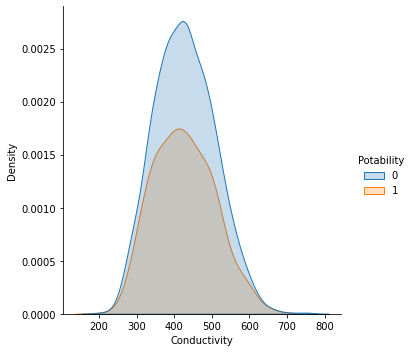

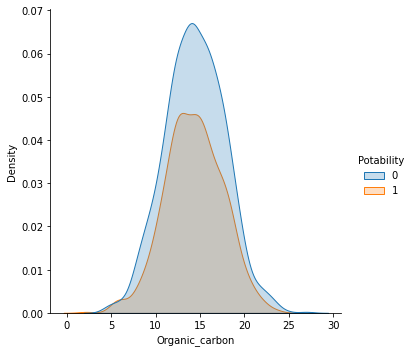

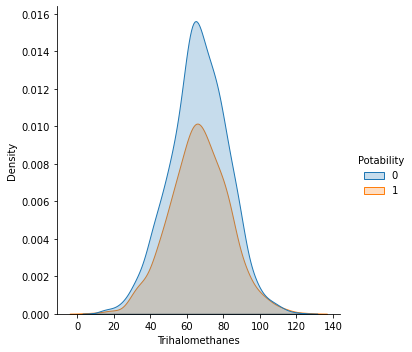

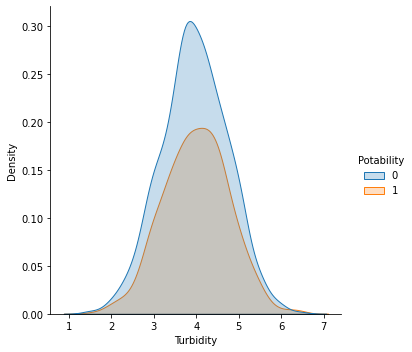

In [115]:
sns.displot(x="Hardness", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="ph", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="Solids", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="Chloramines", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="Sulfate", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="Conductivity", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="Organic_carbon", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="Trihalomethanes", data=water2,hue="Potability",kind='kde',fill=True)
sns.displot(x="Turbidity", data=water2,hue="Potability",kind='kde',fill=True)

## **3. Data Preprocessing**

### (1) Remove Outlier

* 각 feature에 대한 표준편차를 사용하여 각 feature에 대한 upper limit, lower limit을 설정하고 해당 범위 외의 outlier들을 삭제한다.

In [28]:
norm_upper_limit = water_o["Sulfate"].mean() + 3 * water_o["Sulfate"].std()
norm_lower_limit = water_o["Sulfate"].mean() - 3 * water_o["Sulfate"].std()

water = water[(water["Sulfate"] > norm_lower_limit) & (water["Sulfate"] < norm_upper_limit) & water["Sulfate"] != "NaN"]


norm_upper_limit = water_o["ph"].mean() + 3 * water_o["ph"].std()
norm_lower_limit = water_o["ph"].mean() - 3 * water_o["ph"].std()

water = water[(water["ph"] > norm_lower_limit) & (water["ph"] < norm_upper_limit) & water["ph"] != "NaN"]


norm_upper_limit = water_o["Trihalomethanes"].mean() + 3 * water_o["Trihalomethanes"].std()
norm_lower_limit = water_o["Trihalomethanes"].mean() - 3 * water_o["Trihalomethanes"].std()

water = water[(water["Trihalomethanes"] > norm_lower_limit) & (water["Trihalomethanes"] < norm_upper_limit) & water["ph"] != "NaN"]


norm_upper_limit = water_o["Solids"].mean() + 3 * water_o["Solids"].std()
norm_lower_limit = water_o["Solids"].mean() - 3 * water_o["Solids"].std()

water = water[(water["Solids"] > norm_lower_limit) & (water["Solids"] < norm_upper_limit) & water["Solids"] != "NaN"]


norm_upper_limit = water_o["Chloramines"].mean() + 3 * water_o["Chloramines"].std()
norm_lower_limit = water_o["Chloramines"].mean() - 3 * water_o["Chloramines"].std()

water = water[(water["Chloramines"] > norm_lower_limit) & (water["Chloramines"] < norm_upper_limit) & water["Chloramines"] != "NaN"]


norm_upper_limit = water_o["Conductivity"].mean() + 3 * water_o["Conductivity"].std()
norm_lower_limit = water_o["Conductivity"].mean() - 3 * water_o["Conductivity"].std()

water = water[(water["Conductivity"] > norm_lower_limit) & (water["Conductivity"] < norm_upper_limit) & water["Conductivity"] != "NaN"]


norm_upper_limit = water_o["Organic_carbon"].mean() + 3 * water_o["Organic_carbon"].std()
norm_lower_limit = water_o["Organic_carbon"].mean() - 3 * water_o["Organic_carbon"].std()

water = water[(water["Organic_carbon"] > norm_lower_limit) & (water["Organic_carbon"] < norm_upper_limit) & water["Organic_carbon"] != "NaN"]


norm_upper_limit = water_o["Turbidity"].mean() + 3 * water_o["Turbidity"].std()
norm_lower_limit = water_o["Turbidity"].mean() - 3 * water_o["Turbidity"].std()

water = water[(water["Turbidity"] > norm_lower_limit) & (water["Turbidity"] < norm_upper_limit) & water["Turbidity"] != "NaN"]


norm_upper_limit = water_o["Hardness"].mean() + 3 * water_o["Hardness"].std()
norm_lower_limit = water_o["Hardness"].mean() - 3 * water_o["Hardness"].std()

water = water[(water["Hardness"] > norm_lower_limit) & (water["Hardness"] < norm_upper_limit) & water["Hardness"] != "NaN"]

In [29]:
water.shape

(3276, 10)

## (2) train/test split

In [30]:
y=water['Potability']
X=water.drop(['Potability'],axis=1)

X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25,random_state=42)

In [31]:
print(X_train.shape,X_test.shape)

(2457, 9) (819, 9)


## (3) NA imputation
  - train data의 mean 으로 train/test data의 NA를 대체

### 1) train의 mean 값으로 대체

In [32]:
X_train_mean=X_train.copy()
X_test_mean=X_test.copy()

In [33]:
X_train_mean['ph'][X_train['ph'].isna()]=X_train['ph'].mean()
X_train_mean['Sulfate'][X_train['Sulfate'].isna()]=X_train['Sulfate'].mean()
X_train_mean['Trihalomethanes'][X_train['Trihalomethanes'].isna()]=X_train['Trihalomethanes'].mean()

In [34]:
X_test_mean['ph'][X_test['ph'].isna()]=X_train['ph'].mean()
X_test_mean['Sulfate'][X_test['Sulfate'].isna()]=X_train['Sulfate'].mean()
X_test_mean['Trihalomethanes'][X_test['Trihalomethanes'].isna()]=X_train['Trihalomethanes'].mean()

In [35]:
pd.DataFrame(X_train_mean).isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [36]:
pd.DataFrame(X_test_mean).isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

### 2) train의 medain으로 대체

In [37]:
X_train_median=X_train.copy()
X_test_median=X_test.copy()

In [38]:
X_train_median['ph'][X_train['ph'].isna()]=X_train['ph'].median()
X_train_median['Sulfate'][X_train['Sulfate'].isna()]=X_train['Sulfate'].median()
X_train_median['Trihalomethanes'][X_train['Trihalomethanes'].isna()]=X_train['Trihalomethanes'].median()

In [39]:
X_test_median['ph'][X_test['ph'].isna()]=X_train['ph'].median()
X_test_median['Sulfate'][X_test['Sulfate'].isna()]=X_train['Sulfate'].median()
X_test_median['Trihalomethanes'][X_test['Trihalomethanes'].isna()]=X_train['Trihalomethanes'].median()

In [40]:
pd.DataFrame(X_train_mean).isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

In [41]:
pd.DataFrame(X_test_mean).isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
dtype: int64

### 3) NA 값이 있는 row 삭제

In [42]:
water_remove=water.copy()
water_remove=water_remove.dropna(axis=0)

In [43]:
water_remove.shape

(2011, 10)

In [44]:
water_remove.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [45]:
y_remove=water_remove['Potability']
X_remove=water_remove.drop(['Potability'],axis=1)

X_train_remove,X_test_remove,y_train_remove,y_test_remove=train_test_split(X_remove,y_remove,random_state=42)

In [46]:
print(X_train_remove.shape, y_train_remove.shape)
print(X_test_remove.shape, y_test_remove.shape)

(1508, 9) (1508,)
(503, 9) (503,)


## (4) PCA

* 변수들 간의 range를 맞추기 위해 PCA 시도

In [47]:
pca=PCA(n_components=9)
X_train_pca=pd.DataFrame(pca.fit_transform(X_train_remove))
X_test_pca=pd.DataFrame(pca.transform(X_test_remove))

X_train_pca.head()

,0,1,2,3,4,5,6,7,8
0,-9880.937958,10.536297,-4.541087,75.150557,-2.287039,1.297507,2.613492,-2.582062,-1.669584
1,16165.127841,-148.053128,15.553677,19.483125,-11.489988,-1.099680,-0.369974,-1.130826,-0.517638
2,-445.578776,17.024420,16.035694,19.582195,4.169792,0.338864,2.507381,0.053905,0.533119
3,6371.604667,24.691975,77.498713,28.314945,-3.930187,-0.290480,-4.100182,4.367179,-0.719791
4,-20647.344998,-64.936008,-124.499990,31.372405,8.993345,1.777890,3.489223,-1.714651,0.658624


In [48]:
np.round((pca.explained_variance_/pca.explained_variance_.sum())*100,2)

array([9.999e+01, 1.000e-02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00])

* 첫번째 principal component가 전체 분산의 99.999%를 설명함
* 해당 데이터는 PCA를 적용시키기에 적절하지 않음
  * pca를 사용하여 차원 축소 한 데이터로는 logistic regression만 시도

### 1) 차원 축소

* 앞서 확인한 pca 결과에 따라 첫번째 principal component를 사용하여 데이터를 1차원으로 차원 축소

In [49]:
pca1=PCA(n_components=1)
X_train_mean_pca1=pd.DataFrame(pca1.fit_transform(X_train_mean))
X_test_mean_pca1=pd.DataFrame(pca1.transform(X_test_mean))

X_train_median_pca1=pd.DataFrame(pca1.fit_transform(X_train_median))
X_test_median_pca1=pd.DataFrame(pca1.transform(X_test_median))

X_train_remove_pca1=pd.DataFrame(pca1.fit_transform(X_train_remove))
X_test_remove_pca1=pd.DataFrame(pca1.transform(X_test_remove))

## (5) Scaling
  - 추후 스케일링이 필요한 모델링에서 사용
  - pca로 1차원으로 차원 축소한 데이터는 스케일링 필요 없음 (변수가 1개)

In [50]:
def scaler_samples(train_X,test_X):
  scaler = StandardScaler()
  train_X = scaler.fit_transform(train_X)
  test_X = scaler.transform(test_X)

  return train_X, test_X

In [51]:
X_train_mean_sc, X_test_mean_sc=scaler_samples(X_train_mean,X_test_mean)
X_train_median_sc, X_test_median_sc=scaler_samples(X_train_median,X_test_median)
X_train_remove_sc, X_test_remove_sc=scaler_samples(X_train_remove,X_test_remove)

## **4. Model Selection (Experiments)**

* Evaluation metric : f1 score
  * potable로 예측하는 water 중 실제로는 not potable인 경우를 최소화 해야 함 => precision
  * water shortage 문제가 있기 때문에, 실제 potable인 water를 potable 로 예측하는 것 또한 중요함 => recall
  * precision과 recall을 모두 반영할 수 있는 f1 score를 evaluation metric으로 사용함

### (1) K-NN (f1-score)

* K-NN 의 경우 거리 계산 과정에서 feature의 영향력을 동일하게 만들어 주기 위해 feature scaling 이 필요함. 따라서 앞서 scaling해 둔 데이터를 사용

#### 1) NA - mean

In [52]:
knn=KNeighborsClassifier()
param_knn={'n_neighbors':[1,3,5,9,11,25],'weights':['uniform','distance']}

In [53]:
grid_knn=GridSearchCV(knn,param_grid=param_knn, cv=10, refit=True,scoring='f1')
grid_knn.fit(X_train_mean_sc,y_train)
print("best_param:",grid_knn.best_params_)
print("mean cv precision of best parameter:",grid_knn.best_score_)

best_param: {'n_neighbors': 1, 'weights': 'uniform'}
mean cv precision of best parameter: 0.4867651487026966


In [54]:
preds_knn_mean_sc=grid_knn.best_estimator_.predict(X_test_mean_sc)
mt.f1_score(preds_knn_mean_sc,y_test)

0.4656616415410385

#### 2) NA - median

In [55]:
grid_knn=GridSearchCV(knn,param_grid=param_knn, cv=5, refit=True,scoring='f1')
grid_knn.fit(X_train_median_sc,y_train)
print("best_param:",grid_knn.best_params_)
print("mean cv precision of best parameter:",grid_knn.best_score_)

best_param: {'n_neighbors': 1, 'weights': 'uniform'}
mean cv precision of best parameter: 0.4837997999886385


In [56]:
preds_knn_median_sc=grid_knn.best_estimator_.predict(X_test_median_sc)
mt.f1_score(preds_knn_median_sc,y_test)

0.4623115577889447

#### 3) NA - remove

In [57]:
grid_knn=GridSearchCV(knn,param_grid=param_knn, cv=5, refit=True,scoring='f1')
grid_knn.fit(X_train_remove_sc,y_train_remove)
print("best_param:",grid_knn.best_params_)
print("mean cv precision of best parameter:",grid_knn.best_score_)

best_param: {'n_neighbors': 1, 'weights': 'uniform'}
mean cv precision of best parameter: 0.46805010099466254


In [58]:
preds_knn_zero_sc=grid_knn.best_estimator_.predict(X_test_remove_sc)
mt.f1_score(preds_knn_zero_sc,y_test_remove)

0.49095607235142125

### **(2) Logistic Regression (f1 score)**

#### 1) NA - mean

              precision    recall  f1-score   support

           0       0.64      0.56      0.60       510
           1       0.40      0.49      0.44       309

    accuracy                           0.53       819
   macro avg       0.52      0.52      0.52       819
weighted avg       0.55      0.53      0.54       819



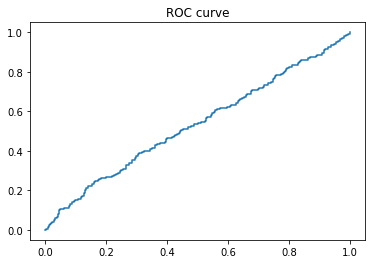

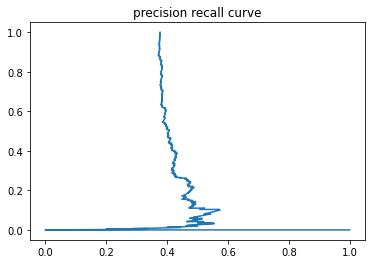

In [59]:
# 평균 대체
clf_mean = LogisticRegression(class_weight="balanced")
clf_mean.fit(X_train_mean, y_train)

y_mean_pred = clf_mean.predict(X_test_mean)

print(classification_report(y_test, y_mean_pred))

fpr, tpr, thresholds = roc_curve(y_test, clf_mean.predict_proba(X_test_mean)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.show()

fpr, tpr, thresholds = precision_recall_curve(y_test, clf_mean.predict_proba(X_test_mean)[:,1])
plt.plot(fpr, tpr)
plt.title('precision recall curve')
plt.show()

#### 2) NA - median

              precision    recall  f1-score   support

           0       0.65      0.58      0.61       510
           1       0.41      0.48      0.44       309

    accuracy                           0.54       819
   macro avg       0.53      0.53      0.53       819
weighted avg       0.56      0.54      0.55       819



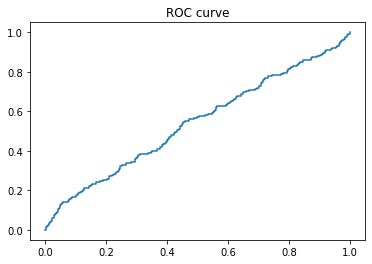

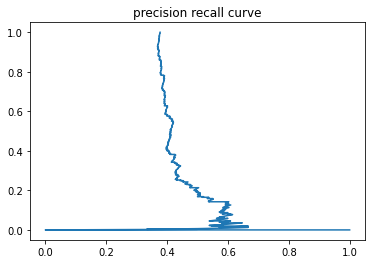

In [60]:
# 중간값 대체
clf_median = LogisticRegression(class_weight="balanced")
clf_median.fit(X_train_median, y_train)

y_median_pred = clf_median.predict(X_test_median)

print(classification_report(y_test, y_median_pred))

fpr, tpr, thresholds = roc_curve(y_test, clf_median.predict_proba(X_test_median)[:,1])
plt.plot(fpr, tpr)
plt.title('ROC curve')
plt.show()

fpr, tpr, thresholds = precision_recall_curve(y_test, clf_median.predict_proba(X_test_median)[:,1])
plt.plot(fpr, tpr)
plt.title('precision recall curve')
plt.show()

#### 3) NA - remove

              precision    recall  f1-score   support

           0       0.55      0.48      0.51       293
           1       0.39      0.46      0.42       210

    accuracy                           0.47       503
   macro avg       0.47      0.47      0.47       503
weighted avg       0.48      0.47      0.47       503



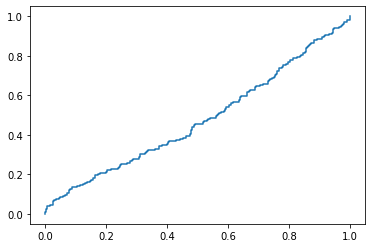

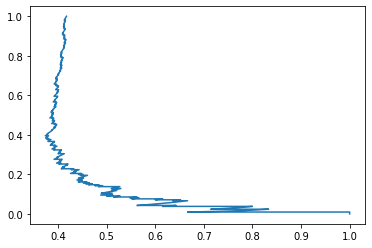

In [61]:
# 행 제거
clf_remove = LogisticRegression(class_weight="balanced")
clf_remove.fit(X_train_remove, y_train_remove)

y_remove_pred = clf_remove.predict(X_test_remove)

print(classification_report(y_test_remove, y_remove_pred))

fpr, tpr, thresholds = roc_curve(y_test_remove, clf_remove.predict_proba(X_test_remove)[:,1])
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = precision_recall_curve(y_test_remove, clf_remove.predict_proba(X_test_remove)[:,1])
plt.plot(fpr, tpr)
plt.show()

#### 4) NA - mean + PCA

              precision    recall  f1-score   support

           0       0.62      0.51      0.56       500
           1       0.40      0.50      0.44       319

    accuracy                           0.51       819
   macro avg       0.51      0.51      0.50       819
weighted avg       0.53      0.51      0.51       819



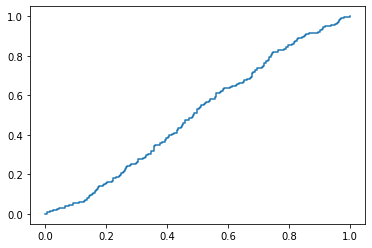

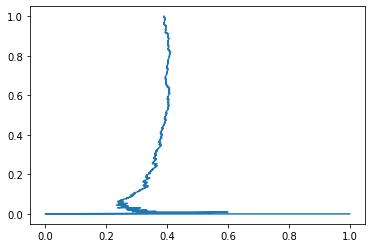

In [62]:
# 평균 대체
X_mean = pd.DataFrame(pd.concat([X_train_mean, X_test_mean]))
y_mean = pd.DataFrame(pd.concat([y_train, y_test]))

pca2 = PCA(n_components=1)
X_pca2 = pca.fit_transform(X_mean)

clf3 = LogisticRegression(class_weight="balanced")

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca2, y_mean, test_size=0.25,random_state=42)

clf3.fit(X_train_pca, y_train_pca)

y_pca_pred = clf3.predict(X_test_pca)

print(classification_report(y_test_pca, y_pca_pred))

fpr, tpr, thresholds = roc_curve(y_test_pca, clf3.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = precision_recall_curve(y_test_pca, clf3.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr)
plt.show()

#### 5) NA - median + PCA

              precision    recall  f1-score   support

           0       0.62      0.56      0.59       500
           1       0.41      0.47      0.44       319

    accuracy                           0.53       819
   macro avg       0.52      0.52      0.51       819
weighted avg       0.54      0.53      0.53       819



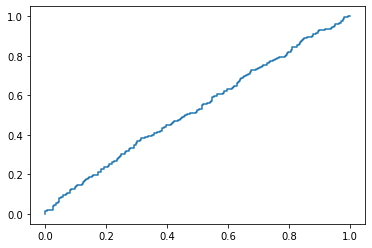

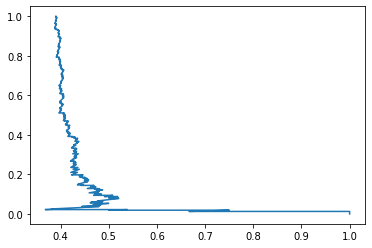

In [63]:
# 중간값 대체
X_median = pd.DataFrame(pd.concat([X_train_median, X_test_median]))
y_median = pd.DataFrame(pd.concat([y_train, y_test]))

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X_median)

clf2 = LogisticRegression(class_weight="balanced")

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y_median, test_size=0.25, shuffle=True, random_state=42)

clf2.fit(X_train_pca, y_train_pca)

y_pca_pred = clf2.predict(X_test_pca)

print(classification_report(y_test_pca, y_pca_pred))

fpr, tpr, thresholds = roc_curve(y_test_pca, clf2.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = precision_recall_curve(y_test_pca, clf2.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr)
plt.show()

#### 6) NA - remove + PCA

              precision    recall  f1-score   support

           0       0.67      0.59      0.63       318
           1       0.42      0.51      0.46       185

    accuracy                           0.56       503
   macro avg       0.55      0.55      0.54       503
weighted avg       0.58      0.56      0.57       503



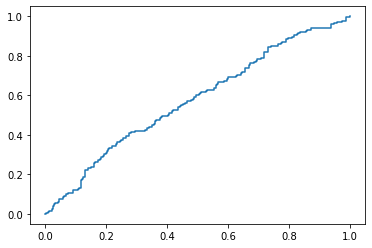

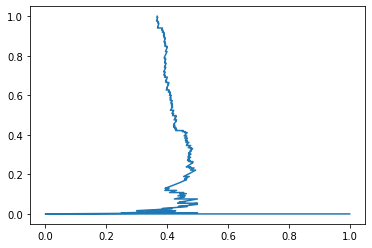

In [64]:
#행 제거
X_remove = pd.DataFrame(pd.concat([X_train_remove, X_test_remove]))
y_remove = pd.DataFrame(pd.concat([y_train_remove, y_test_remove]))

pca3 = PCA(n_components=1)
X_pca3 = pca3.fit_transform(X_remove)

clf4 = LogisticRegression(class_weight="balanced")

X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca3, y_remove, test_size=0.25, random_state=42)

clf4.fit(X_train_pca, y_train_pca)

y_pca_pred = clf4.predict(X_test_pca)

print(classification_report(y_test_pca, y_pca_pred))

fpr, tpr, thresholds = roc_curve(y_test_pca, clf4.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr)
plt.show()

fpr, tpr, thresholds = precision_recall_curve(y_test_pca, clf4.predict_proba(X_test_pca)[:,1])
plt.plot(fpr, tpr)
plt.show()

### **(3) Decision Tree (f1 score)**

#### 1) NA - mean

In [65]:

params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
         }

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_mean,y_train)

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train_mean, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]}, scoring='f1',
             verbose=1)

In [66]:
y_pred = grid_cv.predict(X_test_mean)

print('Test_Accuracy: ', dt_clf.score(X_test_mean, y_test),'\n')
f1_score = mt.f1_score(y_test, y_pred)
print('F1_score: ', format(f1_score,'.2f'),'\n')


Test_Accuracy:  0.5958485958485958 

F1_score:  0.48 



#### 2) NA - median

In [67]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
         }

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_median,y_train)

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train_median, y_train)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]}, scoring='f1',
             verbose=1)

In [68]:
y_pred = grid_cv.predict(X_test_median)

print('Test_Accuracy: ', dt_clf.score(X_test_median, y_test),'\n')
f1_score = mt.f1_score(y_test, y_pred)
print('F1_score: ', format(f1_score,'.2f'),'\n')


Test_Accuracy:  0.5958485958485958 

F1_score:  0.48 



#### 3) NA - remove

In [69]:
params = {
    'max_depth' : [6, 8, 10, 12, 16, 20, 24]
         }

dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_mean,y_train)

grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='f1', cv=5, verbose=1)
grid_cv.fit(X_train_remove, y_train_remove)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]}, scoring='f1',
             verbose=1)

In [70]:
y_pred = grid_cv.predict(X_test_remove)

print('Test_Accuracy: ', dt_clf.score(X_test_remove, y_test_remove),'\n')
f1_score = mt.f1_score(y_test_remove, y_pred)
print('F1_score: ', format(f1_score,'.2f'),'\n')


Test_Accuracy:  0.9105367793240556 

F1_score:  0.53 



### **(4) Random Forest (f1 score)**




#### 1) NA - mean

In [72]:
# define parameter search space
param_grid = {'n_estimators': [100, 200, 350, 500],
              'min_samples_leaf': [2, 10, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']} 
clf = RandomForestClassifier(random_state=42)
gridrf_mean = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 3, scoring='f1')
  
# fit the model for grid search
gridrf_mean.fit(X_train_mean, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.441 total time=   1.9s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.456 total time=   1.5s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.397 total time=   1.3s
[CV 4/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.455 total time=   1.6s
[CV 5/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.459 total time=   1.4s
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.415 total time=   2.7s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.468 total time=   3.0s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.394 total time=  

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [73]:
# print best parameters after grid search
print(gridrf_mean.best_params_)
  
# print how the best model looks after hyper-parameter tuning
print(gridrf_mean.best_estimator_)

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 350}
RandomForestClassifier(min_samples_leaf=2, n_estimators=350, random_state=42)


In [74]:

grid_pred = gridrf_mean.predict(X_test_mean)
print('precision score: ', mt.precision_score(y_test,grid_pred))
print('f1 score: ', mt.f1_score(y_test, grid_pred))

precision score:  0.6493506493506493
f1 score:  0.4319654427645788


In [75]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, grid_pred)

array([[456,  54],
       [209, 100]])

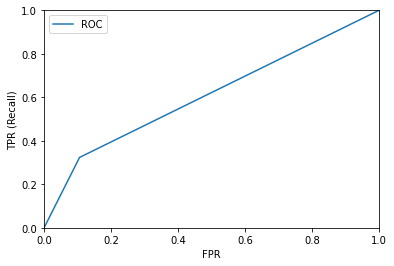

In [76]:
def roc_curve_plot(test_y, grid_pred):
    fprs, tprs, thresholds = roc_curve(test_y, grid_pred)
    
    plt.plot(fprs, tprs, label='ROC')
    
    start, end = plt.xlim()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR')
    plt.ylabel('TPR (Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test, grid_pred)

#### 2) NA - median

In [77]:
# define parameter search space
param_grid = {'n_estimators': [ 100, 200, 350, 500],
              'min_samples_leaf': [2, 10, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']} 
clf = RandomForestClassifier(random_state=42)
gridrf_median = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 3, scoring='f1')
  
# fit the model for grid search
gridrf_median.fit(X_train_median, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.448 total time=   1.3s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.460 total time=   0.9s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.393 total time=   0.7s
[CV 4/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.487 total time=   0.7s
[CV 5/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.450 total time=   0.7s
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.432 total time=   1.5s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.459 total time=   1.4s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.410 total time=  

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [78]:
# print best parameters after grid search
print(gridrf_median.best_params_)
  
# print how the best model looks after hyper-parameter tuning
print(gridrf_median.best_estimator_)

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 100}
RandomForestClassifier(min_samples_leaf=2, random_state=42)


In [79]:
grid_pred = gridrf_median.predict(X_test_median)
print('precision score: ', mt.precision_score(y_test,grid_pred))
print('f1 score: ', mt.f1_score(y_test, grid_pred))

precision score:  0.6709677419354839
f1 score:  0.4482758620689656


In [80]:
confusion_matrix(y_test, grid_pred)

array([[459,  51],
       [205, 104]])

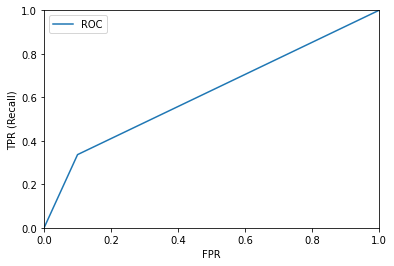

In [81]:
roc_curve_plot(y_test, grid_pred)

#### 3) NA - remove

In [82]:
# define parameter search space
param_grid = {'n_estimators': [100, 200, 350, 500],
              'min_samples_leaf': [2, 10, 30],
              'max_features': ['auto', 'sqrt', 'log2'],
              'criterion': ['gini', 'entropy']} 
clf = RandomForestClassifier(random_state=42)
gridrf_remove = GridSearchCV(clf, param_grid, refit = True, cv=5, verbose = 3, scoring='f1')
  
# fit the model for grid search
gridrf_remove.fit(X_train_remove, y_train_remove)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.453 total time=   0.5s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.412 total time=   0.6s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.495 total time=   0.6s
[CV 4/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.512 total time=   0.6s
[CV 5/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=100;, score=0.457 total time=   0.5s
[CV 1/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.470 total time=   1.1s
[CV 2/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.414 total time=   1.1s
[CV 3/5] END criterion=gini, max_features=auto, min_samples_leaf=2, n_estimators=200;, score=0.488 total time=  

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [2, 10, 30],
                         'n_estimators': [100, 200, 350, 500]},
             scoring='f1', verbose=3)

In [83]:
# print best parameters after grid search
print(gridrf_remove.best_params_)
  
# print how the best model looks after hyper-parameter tuning
print(gridrf_remove.best_estimator_)

{'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 500}
RandomForestClassifier(min_samples_leaf=2, n_estimators=500, random_state=42)


In [84]:
grid_pred_rfremove = gridrf_remove.predict(X_test_remove)
print('precision score: ', mt.precision_score(y_test_remove,grid_pred_rfremove))
print('f1 score: ', mt.f1_score(y_test_remove, grid_pred_rfremove))

precision score:  0.7165354330708661
f1 score:  0.5400593471810089


In [85]:
confusion_matrix(y_test_remove, grid_pred_rfremove)

array([[257,  36],
       [119,  91]])

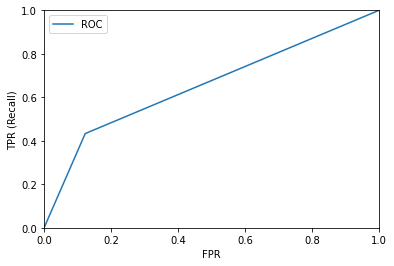

In [86]:
from sklearn.metrics import roc_curve, precision_recall_curve
def roc_curve_plot(test_y, grid_pred):
    fprs, tprs, thresholds = roc_curve(test_y, grid_pred_rfremove)
    
    plt.plot(fprs, tprs, label='ROC')
    
    start, end = plt.xlim()
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    plt.xlabel('FPR')
    plt.ylabel('TPR (Recall)')
    plt.legend()
    plt.show()

roc_curve_plot(y_test_remove, grid_pred)

### **(5) AdaBoost (f1 score)**




#### 1) NA - mean

In [87]:
ada = AdaBoostClassifier(random_state=42)
params_ada = {'n_estimators': [1,10,50,100,250,400,500,600], 'learning_rate': [0.001,0.02,0.01,0.1,0.5,0.8,1]}

In [88]:
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5,refit=True,scoring='f1')
grid_ada.fit(X_train_mean,y_train)
print("best_param:",grid_ada.best_params_)
print("mean cv precision of best parameter:",grid_ada.best_score_)

best_param: {'learning_rate': 1, 'n_estimators': 600}
mean cv precision of best parameter: 0.33241068711494454


In [89]:
preds_ada_mean=grid_ada.best_estimator_.predict(X_test_mean)
mt.f1_score(preds_ada_mean,y_test)

0.3730769230769231

#### 2) NA - median

In [90]:
ada = AdaBoostClassifier(random_state=42)
params_ada = {'n_estimators': [1,10,50,100,250,400,500,600], 'learning_rate': [0.001,0.02,0.01,0.1,0.5,0.8,1]}

In [91]:
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5,refit=True,scoring='f1')
grid_ada.fit(X_train_median,y_train)
print("best_param:",grid_ada.best_params_)
print("mean cv precision of best parameter:",grid_ada.best_score_)

best_param: {'learning_rate': 1, 'n_estimators': 500}
mean cv precision of best parameter: 0.3265866143106547


In [92]:
preds_ada_median=grid_ada.best_estimator_.predict(X_test_median)
mt.f1_score(preds_ada_median,y_test)

0.3471400394477318

#### 3) NA - remove

In [93]:
ada = AdaBoostClassifier(random_state=42)
params_ada = {'n_estimators': [1,10,50,100,250,400,500,600], 'learning_rate': [0.001,0.02,0.01,0.1,0.5,0.8,1]}

In [94]:
grid_ada =  GridSearchCV(ada, param_grid=params_ada, cv=5,refit=True, scoring='f1')
grid_ada.fit(X_train_remove,y_train_remove)
print("best_param:",grid_ada.best_params_)
print("mean cv precision of best parameter:",grid_ada.best_score_)

best_param: {'learning_rate': 1, 'n_estimators': 600}
mean cv precision of best parameter: 0.36175614023452934


In [95]:
preds_ada_remove=grid_ada.best_estimator_.predict(X_test_remove)
mt.f1_score(preds_ada_remove,y_test_remove)

0.38746438746438744

### **(6) XGBoost (f1 score)**




#### 1) NA - mean

In [96]:
xg = XGBClassifier()
xg_parameters ={'n_estimators': [100, 200, 500], 'learning_rate':[0.1, 0.2], 'random_state': [42],'max_depth':[3,5,10]}

grid_search_rf = ms.GridSearchCV ( estimator = xg, param_grid = xg_parameters, cv = 10 )
 
grid_search_rf.fit(X_train_mean, y_train)

best_xg = grid_search_rf.best_estimator_
print('optimal parameter: {}'.format(grid_search_rf.best_params_))
best_xg.score(X_test_mean, y_test)

optimal parameter: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 100, 'random_state': 42}


0.6788766788766789

In [97]:
best_xg.fit(X_train_mean, y_train)

y_pred = best_xg.predict(X_test_mean)

mt.f1_score(y_pred, y_test)

0.48732943469785583

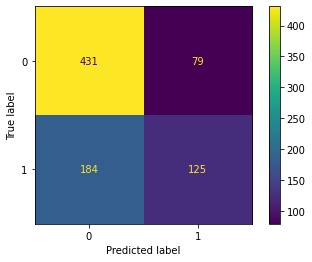

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       510
           1       0.61      0.40      0.49       309

    accuracy                           0.68       819
   macro avg       0.66      0.62      0.63       819
weighted avg       0.67      0.68      0.66       819



In [98]:
cm = confusion_matrix(y_test, y_pred, labels=best_xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xg.classes_)
disp.plot()

plt.show()

print(classification_report(y_test, y_pred))

#### 2) NA - median

In [99]:
xg = XGBClassifier()
xg_parameters ={'n_estimators': [100, 200, 500], 'learning_rate':[0.1, 0.2], 'random_state': [42],'max_depth':[3,5,10]}

grid_search_rf = ms.GridSearchCV ( estimator = xg, param_grid = xg_parameters, cv = 10 )
 
grid_search_rf.fit(X_train_median, y_train)

best_xg = grid_search_rf.best_estimator_
print('optimal parameter: {}'.format(grid_search_rf.best_params_))
best_xg.score(X_test_median, y_test)

optimal parameter: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'random_state': 42}


0.663003663003663

In [100]:
best_xg.fit(X_train_median, y_train)

y_pred = best_xg.predict(X_test_median)

mt.f1_score(y_pred, y_test)

0.4225941422594143

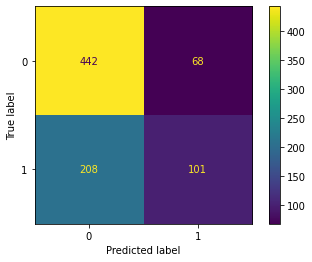

              precision    recall  f1-score   support

           0       0.68      0.87      0.76       510
           1       0.60      0.33      0.42       309

    accuracy                           0.66       819
   macro avg       0.64      0.60      0.59       819
weighted avg       0.65      0.66      0.63       819



In [101]:
cm = confusion_matrix(y_test, y_pred, labels=best_xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xg.classes_)
disp.plot()

plt.show()

print(classification_report(y_test, y_pred))

#### 3) NA - remove

In [102]:
xg = XGBClassifier()
xg_parameters ={'n_estimators': [100, 200, 500], 'learning_rate':[0.1, 0.2], 'random_state': [42],'max_depth':[3,5,10]}

grid_search_rf = ms.GridSearchCV ( estimator = xg, param_grid = xg_parameters, cv = 10 )
 
grid_search_rf.fit(X_train_remove, y_train_remove)

best_xg = grid_search_rf.best_estimator_
print('optimal parameter: {}'.format(grid_search_rf.best_params_))
best_xg.score(X_test_remove, y_test_remove)

optimal parameter: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}


0.6361829025844931

In [103]:
best_xg.fit(X_train_remove, y_train_remove)

y_pred = best_xg.predict(X_test_remove)

mt.f1_score(y_pred, y_test_remove)

0.5171503957783641

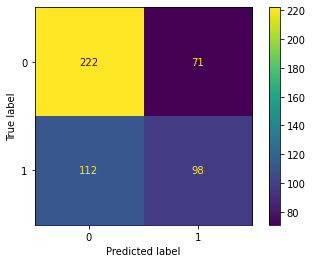

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       293
           1       0.58      0.47      0.52       210

    accuracy                           0.64       503
   macro avg       0.62      0.61      0.61       503
weighted avg       0.63      0.64      0.63       503



In [104]:
cm = confusion_matrix(y_test_remove, y_pred, labels=best_xg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_xg.classes_)
disp.plot()

plt.show()

print(classification_report(y_test_remove, y_pred))

## **5. Result**

### (1) Selected Model
  * RandomForestClassifier
  * Data : Remove NA
  * parameter : {'criterion': 'gini', 'max_features': 'auto', 'min_samples_leaf': 2, 'n_estimators': 500}



In [107]:
final_model=RandomForestClassifier(criterion="gini", max_features="auto",min_samples_leaf=2,n_estimators=500,random_state=42)
final_model.fit(X_train_remove,y_train_remove)
final_preds=final_model.predict(X_test_remove)

### (2) Results of experiment

#### 1) Precision, recall, f1-score

In [108]:
print("precision : ", mt.precision_score(final_preds,y_test_remove))
print("recall : ", mt.recall_score(final_preds, y_test_remove))
print("f1-score : ", mt.f1_score(final_preds, y_test_remove))

precision :  0.43333333333333335
recall :  0.7165354330708661
f1-score :  0.5400593471810089


#### 2) ROC curve

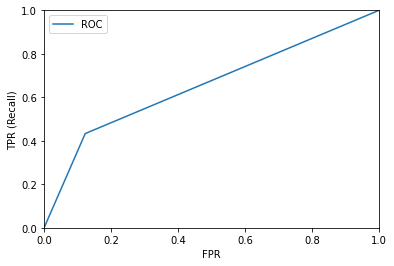

In [110]:
roc_curve_plot(y_test_remove,final_preds)

#### 3) feature importance

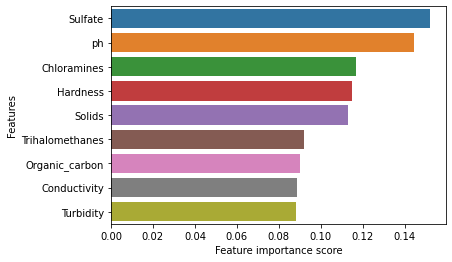

In [111]:
feature_scores = pd.Series(final_model.feature_importances_, index=X_train_remove.columns).sort_values(ascending=False)
feature_scores

f, ax = plt.subplots()
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_yticklabels(feature_scores.index)
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

#### 4) Recall-Precision Curve

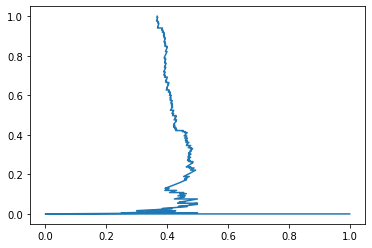

In [113]:
fprs, tprs, thresholds = precision_recall_curve(final_preds,y_test_remove)
plt.plot(fpr, tpr)
plt.show()

## **6. Conclusion**

* Kaggle에 존재하는 다른 code들과 비교해보았을 때 상위 5~10% 정도의 성능을 보이는 것으로 보인다.
* 그럼에도 불구하고, 우리의 final model의 성능이 절대적으로 좋은 편은 아니며, 이는 곧 Kaggle의 다른 코드들도 전반적으로 좋지 않은 성능을 보임을 의미한다.
* 우리가 분석한 low performance의 원인은 다음과 같다.

  (1) 데이터의 label이 WHO에서 권고하는 potable 기준에 부합하지 않는다. 예를들어, potable water의 ph는 5.8~8.5 범위 내에 있어야 하는데,ph가 3.88,10.00 등등 범위 밖이지만 label이 potable인 데이터들이 존재한다. 이러한 문제가 ph가 아닌 다른 feature에서도 존재한다.

  (2) 거의 모든 변수들이 거의 정확한 normal distribution을 따른다. 이 때문에 실제 많은 사람들이 Kaggle의 discussion 메뉴에서 해당 데이터가 실제 데이터가 아닌 정규분포에서 random하게 생성된 데이터일 가능성을 제시하고 있다.